<h1>Importing the libraries</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1>Importing the dataset</h1>

In [2]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y), 1)

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


<h1>Feature Scaling</h1>

In [7]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


<h1>Training the SVR model on the whole dataset</h1>

In [10]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

SVR()

<h1>Predicting a new result</h1>

In [11]:
sc_y.inverse_transform([regressor.predict(sc_X.transform([[6.5]]))])

array([[170370.0204065]])

<h1>Visualising the SVR results</h1>

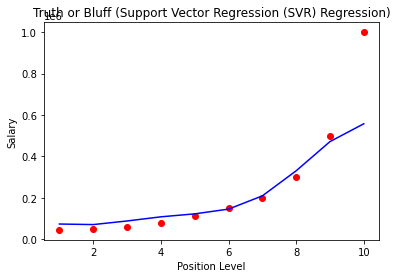

In [12]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform([regressor.predict(X)]).reshape(10, 1), color='blue')
plt.title('Truth or Bluff (Support Vector Regression (SVR) Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')    
plt.show()